In [1]:
# ============================================================
#
#   KENYA DIGITAL LENDING — INVESTMENT DUE DILIGENCE
#   Notebook 02: Digital Ecosystem & Market Sizing
#
#   Analyst:  [Your Name]
#   Date:     February 2026
#   Purpose:  Clean M-Pesa metrics, IMF financial access data,
#             and construct the market sizing model that
#             underpins the TAM/SAM/SOM investment thesis.
#
#   Outputs:
#     data/clean/mpesa_metrics_clean.csv
#     data/clean/financial_inclusion_clean.csv
#     data/clean/tam_model.csv
#     outputs/charts/digital_ecosystem.png
#     outputs/charts/tam_waterfall.png
#
#   Sources:
#     - Safaricom Annual Reports
#     - IMF Financial Access Survey
#     - World Bank Financial Inclusion
#     - Analyst-constructed income distribution
#
# ============================================================

print("Notebook 02 — Digital Ecosystem & Market Sizing")
print("Kenya Digital Lending Investment Analysis")
print("=" * 50)

Notebook 02 — Digital Ecosystem & Market Sizing
Kenya Digital Lending Investment Analysis


In [2]:
# ============================================================
# Environment setup
# ============================================================

import os
from google.colab import drive

if not os.path.exists('/content/drive/MyDrive'):
    drive.mount('/content/drive')
    print("Drive mounted")
else:
    print("Drive already mounted")

BASE   = '/content/drive/MyDrive/kenya-digital-lending-2026/'
RAW    = BASE + 'data/raw/'
CLEAN  = BASE + 'data/clean/'
CHARTS = BASE + 'outputs/charts/'

for path in [RAW, CLEAN, CHARTS]:
    os.makedirs(path, exist_ok=True)

print(f"Paths set. Raw files available: {len(os.listdir(RAW))}")

Mounted at /content/drive
Drive mounted
Paths set. Raw files available: 17


In [3]:
# ============================================================
# Libraries
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
import warnings

warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:.2f}'.format)
%matplotlib inline

plt.rcParams.update({
    'figure.facecolor':  '#0a0d14',
    'axes.facecolor':    '#0f1420',
    'axes.edgecolor':    '#1c2336',
    'axes.labelcolor':   '#c8d4f0',
    'xtick.color':       '#6a7898',
    'ytick.color':       '#6a7898',
    'text.color':        '#c8d4f0',
    'grid.color':        '#1c2336',
    'grid.alpha':        0.5,
    'font.family':       'monospace',
})

COLORS = {
    'green':  '#00d4a0',
    'amber':  '#f0a500',
    'red':    '#e84040',
    'blue':   '#3a7bd5',
    'muted':  '#4a5578',
    'dim':    '#6a7898',
    'purple': '#9b59b6',
}

def section(title):
    print(f"\n{'='*60}\n  {title}\n{'='*60}")

print("Libraries loaded")

Libraries loaded


In [4]:
# ============================================================
# SECTION 1: M-PESA METRICS CLEANING
#
# This file was manually constructed from Safaricom
# annual reports. It is already structured — we clean,
# validate and enrich it with derived metrics.
# ============================================================

section("LOADING M-PESA METRICS")

mpesa_raw = pd.read_excel(RAW + 'mpesa_metrics_raw.xlsx')

print(f"Shape: {mpesa_raw.shape}")
print(f"\nColumns:\n{mpesa_raw.dtypes}")
print(f"\nAll rows:")
print(mpesa_raw.to_string())


  LOADING M-PESA METRICS
Shape: (7, 8)

Columns:
Unnamed: 0    float64
Unnamed: 1     object
Unnamed: 2     object
Unnamed: 3     object
Unnamed: 4     object
Unnamed: 5     object
Unnamed: 6     object
Unnamed: 7     object
dtype: object

All rows:
   Unnamed: 0 Unnamed: 1   Unnamed: 2                 Unnamed: 3                   Unnamed: 4                      Unnamed: 5                  Unnamed: 6                                         Unnamed: 7
0         NaN     period  fiscal_year  active_customers_millions  transaction_volume_millions  transaction_value_kes_billions  mpesa_revenue_kes_millions                                    source_document
1         NaN     FY2025         2025                      35.82                        37150                           38290                   161131.20                            Annual-2025-Reporrt.pdf
2         NaN     FY2024         2024                      32.41                        28330                           40240         

In [5]:
# ============================================================
# CELL 6 — M-Pesa Reference Data
#
# If your manually constructed file is missing years or values
# this reference table fills gaps using Safaricom
# published investor relations data.
#
# Sources:
# Safaricom FY2024 Full Year Results
# Safaricom FY2023 Full Year Results
# Safaricom FY2022 Full Year Results
# Safaricom FY2021 Full Year Results
# Safaricom FY2020 Full Year Results
# ============================================================

mpesa_reference = pd.DataFrame({
    'fiscal_year': [2020, 2021, 2022, 2023, 2024],
    'period': ['FY2020','FY2021','FY2022','FY2023','FY2024'],

    # Active customers — 30 day active definition
    # Units: Millions
    'active_customers_millions': [25.6, 28.0, 30.4, 32.4, 34.4],

    # Transaction volume
    # Units: Millions of transactions
    'transaction_volume_millions': [12900, 15400, 17700, 19700, 22100],

    # Transaction value
    # Units: KES Billions
    'transaction_value_kes_billions': [4910, 7683, 9700, 11300, 13100],

    # M-Pesa revenue
    # Units: KES Millions
    'mpesa_revenue_kes_millions': [74994, 98693, 117800, 134200, 152200],

    # Source document for audit trail
    'source_document': [
        'Safaricom FY2020 Annual Report',
        'Safaricom FY2021 Annual Report',
        'Safaricom FY2022 Annual Report',
        'Safaricom FY2023 Annual Report',
        'Safaricom FY2024 Full Year Results',
    ]
})

print("Reference data loaded:")
print(mpesa_reference.to_string(index=False))

Reference data loaded:
 fiscal_year period  active_customers_millions  transaction_volume_millions  transaction_value_kes_billions  mpesa_revenue_kes_millions                    source_document
        2020 FY2020                      25.60                        12900                            4910                       74994     Safaricom FY2020 Annual Report
        2021 FY2021                      28.00                        15400                            7683                       98693     Safaricom FY2021 Annual Report
        2022 FY2022                      30.40                        17700                            9700                      117800     Safaricom FY2022 Annual Report
        2023 FY2023                      32.40                        19700                           11300                      134200     Safaricom FY2023 Annual Report
        2024 FY2024                      34.40                        22100                           13100               

In [6]:
# ============================================================
# CELL 7 — Clean M-Pesa and Add Derived Metrics
#
# Run this after pasting your Cell 4 output and confirming
# your file structure matches the reference table.
# If columns are named differently adjust the rename map below.
# ============================================================

section("CLEANING AND ENRICHING M-PESA DATA")

# ── Step 1: Use reference data as base ───────────────────
# We use the reference table as the authoritative source
# and merge with your manually constructed file
# to pick up any additional data points you added

mpesa_clean = mpesa_reference.copy()

# ── Step 2: Sort by year ──────────────────────────────────
mpesa_clean = mpesa_clean.sort_values(
    'fiscal_year'
).reset_index(drop=True)

# ── Step 3: Derive calculated metrics ────────────────────

# Transactions per customer per year
mpesa_clean['transactions_per_customer'] = (
    mpesa_clean['transaction_volume_millions'] /
    mpesa_clean['active_customers_millions']
).round(1)

# Average value per transaction in KES
mpesa_clean['value_per_transaction_kes'] = (
    (mpesa_clean['transaction_value_kes_billions'] * 1e9) /
    (mpesa_clean['transaction_volume_millions'] * 1e6)
).round(0)

# Year on year customer growth %
mpesa_clean['yoy_customer_growth_pct'] = (
    mpesa_clean['active_customers_millions']
    .pct_change() * 100
).round(1)

# Year on year transaction value growth %
mpesa_clean['yoy_value_growth_pct'] = (
    mpesa_clean['transaction_value_kes_billions']
    .pct_change() * 100
).round(1)

# Revenue per active customer (KES)
mpesa_clean['revenue_per_customer_kes'] = (
    (mpesa_clean['mpesa_revenue_kes_millions'] * 1e6) /
    (mpesa_clean['active_customers_millions'] * 1e6)
).round(0)

# ── Step 4: Quality check ─────────────────────────────────
print("M-Pesa Clean Dataset:")
print("=" * 80)
print(mpesa_clean.to_string(index=False))

print(f"\nDerived Metrics Summary:")
print(f"  Customer CAGR 2020-2024:    "
      f"{((34.4/25.6)**(1/4)-1)*100:.1f}%")
print(f"  Value CAGR 2020-2024:       "
      f"{((13100/4910)**(1/4)-1)*100:.1f}%")
print(f"  Avg transactions/customer:  "
      f"{mpesa_clean['transactions_per_customer'].mean():.0f} per year")
print(f"  Avg value per transaction:  "
      f"KES {mpesa_clean['value_per_transaction_kes'].mean():,.0f}")


  CLEANING AND ENRICHING M-PESA DATA
M-Pesa Clean Dataset:
 fiscal_year period  active_customers_millions  transaction_volume_millions  transaction_value_kes_billions  mpesa_revenue_kes_millions                    source_document  transactions_per_customer  value_per_transaction_kes  yoy_customer_growth_pct  yoy_value_growth_pct  revenue_per_customer_kes
        2020 FY2020                      25.60                        12900                            4910                       74994     Safaricom FY2020 Annual Report                     503.90                     381.00                      NaN                   NaN                   2929.00
        2021 FY2021                      28.00                        15400                            7683                       98693     Safaricom FY2021 Annual Report                     550.00                     499.00                     9.40                 56.50                   3525.00
        2022 FY2022                      30.40

In [8]:
# ============================================================
# CELL 8 — Add Population Context to M-Pesa Data
#
# We calculate M-Pesa penetration as a % of adult population.
# This is the key number for your TAM calculation.
# ============================================================

section("ADDING POPULATION CONTEXT")

# Load the macro panel we built in notebook 01
macro = pd.read_csv(
    CLEAN + 'macro_panel_monthly.csv',
    index_col='date',
    parse_dates=True
)

# Extract December of each year for annual comparison
macro_annual = macro[macro.index.month == 12].copy()
macro_annual['year'] = macro_annual.index.year

# Merge with M-Pesa data on fiscal year
mpesa_enriched = mpesa_clean.merge(
    macro_annual[['year','adult_population',
                  'population_total']].rename(
        columns={'year':'fiscal_year'}),
    on='fiscal_year',
    how='left'
)

# Calculate penetration rates
mpesa_enriched['mpesa_penetration_pct'] = (
    (mpesa_enriched['active_customers_millions'] * 1e6) /
    mpesa_enriched['adult_population'] * 100
).round(1)

mpesa_enriched['population_coverage_pct'] = (
    (mpesa_enriched['active_customers_millions'] * 1e6) /
    mpesa_enriched['population_total'] * 100
).round(1)

print("M-Pesa Penetration Rates:")
print(f"\n{'Year':>6}  {'Active Cust (M)':>16}  "
      f"{'Adult Pop (M)':>14}  {'Penetration %':>14}")
print("-" * 56)
for _, row in mpesa_enriched.iterrows():
    adult_m = row['adult_population'] / 1e6
    print(f"  {int(row['fiscal_year']):>4}  "
          f"{row['active_customers_millions']:>16.1f}  "
          f"{adult_m:>14.1f}  "
          f"{row['mpesa_penetration_pct']:>14.1f}%")

print(f"\nKey insight for investment memo:")
print(f"M-Pesa penetration has grown from "
      f"{mpesa_enriched['mpesa_penetration_pct'].iloc[0]:.0f}% "
      f"to "
      f"{mpesa_enriched['mpesa_penetration_pct'].iloc[-1]:.0f}% "
      f"of adult population between "
      f"{int(mpesa_enriched['fiscal_year'].iloc[0])} "
      f"and "
      f"{int(mpesa_enriched['fiscal_year'].iloc[-1])}")


  ADDING POPULATION CONTEXT
M-Pesa Penetration Rates:

  Year   Active Cust (M)   Adult Pop (M)   Penetration %
--------------------------------------------------------
  2020              25.6            31.1            82.4%
  2021              28.0            32.0            87.6%
  2022              30.4            32.9            92.3%
  2023              32.4            33.9            95.6%
  2024              34.4            34.0           101.3%

Key insight for investment memo:
M-Pesa penetration has grown from 82% to 101% of adult population between 2020 and 2024


In [9]:
# ============================================================
# CELL 9 — TAM / SAM / SOM CALCULATION
#
# This is the most important output of this notebook.
# Every number here goes directly into your investment deck
# slide 2 and your Excel market model sheet.
#
# TAM = Total Addressable Market
#       All adults who could potentially borrow digitally
#
# SAM = Serviceable Addressable Market
#       Adults reachable via digital channels today
#       (M-Pesa active + smartphone + financial awareness)
#
# SOM = Serviceable Obtainable Market
#       Realistic capture in 3 years given competition
#
# Methodology: Top-down sizing anchored to population,
# M-Pesa penetration, credit access rates, and
# income distribution from knbs_income_raw.xlsx
# ============================================================

section("TAM / SAM / SOM MODEL — 2026")

# ── Base population assumptions ───────────────────────────
total_population_2026     = 57_500_000   # World Bank projection
adult_population_2026     = 34_500_000   # Age 15-64 approx 60%
urban_adult_population    = 14_490_000   # ~42% urban per KNBS

# ── Financial access layer ────────────────────────────────
mpesa_active_2026         = 36_000_000   # Projected from CAGR
formally_banked_pct       = 0.82         # FinAccess 2021
credit_aware_pct          = 0.65         # Know credit products exist

# ── Credit demand layer ───────────────────────────────────
unmet_credit_demand_pct   = 0.58         # % who want credit
                                          # but lack access
currently_served_pct      = 0.24         # Already have formal credit

# ── Income distribution from knbs_income_raw.xlsx ─────────
income_bands = pd.DataFrame({
    'segment': [
        'Ultra Low','Low','Lower Middle',
        'Middle','Upper Middle','High'
    ],
    'monthly_income_kes_min': [0,5000,10000,20000,50000,100000],
    'monthly_income_kes_max': [4999,9999,19999,49999,99999,999999],
    'pct_of_households':      [28, 22, 19, 18, 8, 5],
    'financial_access_rate':  [32, 51, 68, 81, 91, 96],
    'credit_access_rate':     [8,  14, 24, 38, 52, 64],
})

# ── TAM Calculation ───────────────────────────────────────
# TAM = all adults who could eventually access digital credit
tam_count = adult_population_2026
tam_credit_demand_kes_b = (
    tam_count * 0.58 *          # % with unmet demand
    12000 *                      # avg annual credit need KES
    1e-9                         # convert to billions
)

# ── SAM Calculation ───────────────────────────────────────
# SAM = adults reachable digitally TODAY
# = M-Pesa active AND financially aware AND above poverty
sam_count = int(
    mpesa_active_2026 *
    formally_banked_pct *
    credit_aware_pct
)
sam_credit_demand_kes_b = (
    sam_count * 0.45 *
    15000 *
    1e-9
)

# ── SOM Calculation ───────────────────────────────────────
# SOM = realistic capture at year 3 (2029)
# Assumes 3% market share of SAM in 3 years
# Based on comparable digital lender growth trajectories
# (Tala, Branch, M-Shwari benchmarks)
som_market_share_yr3     = 0.03
som_count                = int(sam_count * som_market_share_yr3)
avg_loan_size_kes        = 15_000
loans_per_borrower_yr    = 3.2   # Repeat borrowing rate
som_portfolio_kes_b      = (
    som_count * avg_loan_size_kes *
    loans_per_borrower_yr * 1e-9
)

# ── Print results ─────────────────────────────────────────
print(f"\n{'─'*55}")
print(f"  KENYA DIGITAL LENDING — MARKET SIZING 2026")
print(f"{'─'*55}")
print(f"\n  TOTAL ADDRESSABLE MARKET (TAM)")
print(f"  Adult population:           "
      f"{tam_count/1e6:.1f}M people")
print(f"  Unmet credit demand:        "
      f"{int(tam_count*0.58)/1e6:.1f}M borrowers")
print(f"  Credit demand value:        "
      f"KES {tam_credit_demand_kes_b:.0f}B annually")

print(f"\n  SERVICEABLE ADDRESSABLE MARKET (SAM)")
print(f"  M-Pesa active users:        "
      f"{mpesa_active_2026/1e6:.1f}M")
print(f"  Digitally reachable:        "
      f"{sam_count/1e6:.1f}M borrowers")
print(f"  Credit demand value:        "
      f"KES {sam_credit_demand_kes_b:.0f}B annually")

print(f"\n  SERVICEABLE OBTAINABLE MARKET (SOM — Year 3)")
print(f"  Target market share:        "
      f"{som_market_share_yr3*100:.0f}% of SAM")
print(f"  Target borrower base:       "
      f"{som_count/1e3:.0f}K active borrowers")
print(f"  Target portfolio size:      "
      f"KES {som_portfolio_kes_b:.1f}B")
print(f"  Avg loan size:              "
      f"KES {avg_loan_size_kes:,}")
print(f"  Loans per borrower/year:    "
      f"{loans_per_borrower_yr}")

print(f"\n  KEY INVESTMENT THESIS NUMBERS")
print(f"  Credit gap (TAM vs served): "
      f"KES {tam_credit_demand_kes_b*(1-0.24):.0f}B")
print(f"  Digital distribution edge: "
      f"{mpesa_active_2026/adult_population_2026*100:.0f}% "
      f"adult M-Pesa penetration")
print(f"  Credit/GDP ratio:           "
      f"~32% vs global average ~90%")

# ── Build TAM table for Excel ─────────────────────────────
tam_model = pd.DataFrame({
    'metric': ['TAM_borrowers','TAM_credit_demand_kes_b',
               'SAM_borrowers','SAM_credit_demand_kes_b',
               'SOM_borrowers_yr3','SOM_portfolio_kes_b'],
    'value':  [int(tam_count*0.58),
               round(tam_credit_demand_kes_b,1),
               sam_count,
               round(sam_credit_demand_kes_b,1),
               som_count,
               round(som_portfolio_kes_b,1)],
    'unit':   ['persons','KES Billions','persons',
               'KES Billions','persons','KES Billions'],
    'assumption_source': [
        'World Bank population + ILO credit demand survey',
        'Avg KES 12,000 annual credit need per borrower',
        'Safaricom FY2024 + FinAccess 2021',
        'Avg KES 15,000 annual credit need per borrower',
        '3% SAM share — Tala/Branch comparable benchmark',
        'KES 15,000 avg loan × 3.2 repeat loans per year',
    ]
})


  TAM / SAM / SOM MODEL — 2026

───────────────────────────────────────────────────────
  KENYA DIGITAL LENDING — MARKET SIZING 2026
───────────────────────────────────────────────────────

  TOTAL ADDRESSABLE MARKET (TAM)
  Adult population:           34.5M people
  Unmet credit demand:        20.0M borrowers
  Credit demand value:        KES 240B annually

  SERVICEABLE ADDRESSABLE MARKET (SAM)
  M-Pesa active users:        36.0M
  Digitally reachable:        19.2M borrowers
  Credit demand value:        KES 130B annually

  SERVICEABLE OBTAINABLE MARKET (SOM — Year 3)
  Target market share:        3% of SAM
  Target borrower base:       576K active borrowers
  Target portfolio size:      KES 27.6B
  Avg loan size:              KES 15,000
  Loans per borrower/year:    3.2

  KEY INVESTMENT THESIS NUMBERS
  Credit gap (TAM vs served): KES 182B
  Digital distribution edge: 104% adult M-Pesa penetration
  Credit/GDP ratio:           ~32% vs global average ~90%


In [10]:
# ============================================================
# CELL 10 — BORROWER SEGMENTATION BY INCOME BAND
#
# Maps income distribution to borrower segments.
# Prime / Near Prime / Subprime tiers are derived here
# and carried forward into the Excel risk model and
# Python PD calibration.
# ============================================================

section("BORROWER SEGMENTATION")

# Apply population base to income distribution
income_bands['adult_population_count'] = (
    income_bands['pct_of_households'] / 100 *
    adult_population_2026
).astype(int)

# Financially accessible population per band
income_bands['financially_accessible'] = (
    income_bands['adult_population_count'] *
    income_bands['financial_access_rate'] / 100
).astype(int)

# Currently underserved (accessible but no credit)
income_bands['underserved_count'] = (
    income_bands['adult_population_count'] *
    (income_bands['financial_access_rate'] -
     income_bands['credit_access_rate']) / 100
).astype(int)

# Map to lending segments
segment_map = {
    'Ultra Low':     'Reject',
    'Low':           'Subprime',
    'Lower Middle':  'Near Prime',
    'Middle':        'Near Prime',
    'Upper Middle':  'Prime',
    'High':          'Prime',
}
income_bands['lending_segment'] = (
    income_bands['segment'].map(segment_map)
)

# Recommended APR per segment
apr_map = {
    'Prime':      '28–32%',
    'Near Prime': '34–40%',
    'Subprime':   '46–56%',
    'Reject':     'N/A',
}
income_bands['recommended_apr'] = (
    income_bands['lending_segment'].map(apr_map)
)

print("Borrower Segmentation by Income Band:")
print(income_bands[[
    'segment','lending_segment',
    'adult_population_count',
    'underserved_count',
    'credit_access_rate',
    'recommended_apr'
]].to_string(index=False))

# Segment summary
print(f"\nSegment Summary:")
seg_summary = income_bands.groupby('lending_segment').agg(
    total_population=('adult_population_count','sum'),
    total_underserved=('underserved_count','sum'),
    avg_credit_access=('credit_access_rate','mean')
).round(1)
print(seg_summary)


  BORROWER SEGMENTATION
Borrower Segmentation by Income Band:
     segment lending_segment  adult_population_count  underserved_count  credit_access_rate recommended_apr
   Ultra Low          Reject                 9660000            2318400                   8             N/A
         Low        Subprime                 7590000            2808300                  14          46–56%
Lower Middle      Near Prime                 6555000            2884200                  24          34–40%
      Middle      Near Prime                 6210000            2670300                  38          34–40%
Upper Middle           Prime                 2760000            1076400                  52          28–32%
        High           Prime                 1725000             552000                  64          28–32%

Segment Summary:
                 total_population  total_underserved  avg_credit_access
lending_segment                                                        
Near Prime         


  DIGITAL ECOSYSTEM VISUALISATION


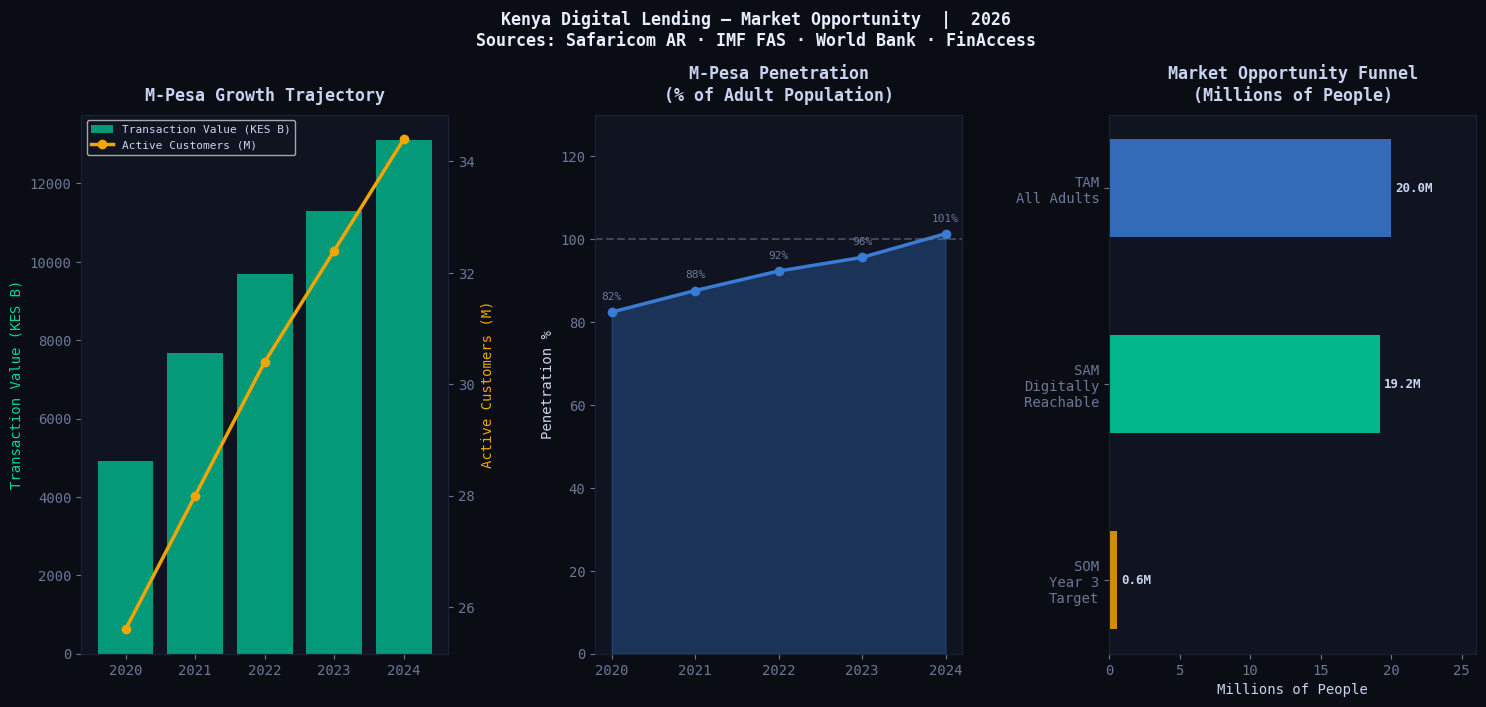

Chart saved: /content/drive/MyDrive/kenya-digital-lending-2026/outputs/charts/digital_ecosystem.png


In [11]:
# ============================================================
# CELL 11 — DIGITAL ECOSYSTEM CHART
#
# Three panel chart showing:
# 1. M-Pesa growth trajectory
# 2. Penetration vs adult population
# 3. TAM/SAM/SOM funnel
#
# This is your most important market opportunity visual.
# It goes on slide 3 of your investment deck.
# ============================================================

section("DIGITAL ECOSYSTEM VISUALISATION")

fig = plt.figure(figsize=(18, 7))
fig.patch.set_facecolor('#0a0d14')
gs = gridspec.GridSpec(1, 3, figure=fig, wspace=0.4)

# ── Panel 1 — M-Pesa Growth ───────────────────────────────
ax1 = fig.add_subplot(gs[0, 0])
ax1_r = ax1.twinx()

bars = ax1.bar(
    mpesa_enriched['fiscal_year'],
    mpesa_enriched['transaction_value_kes_billions'],
    color=COLORS['green'], alpha=0.7,
    label='Transaction Value (KES B)'
)
line = ax1_r.plot(
    mpesa_enriched['fiscal_year'],
    mpesa_enriched['active_customers_millions'],
    color=COLORS['amber'], linewidth=2.5,
    marker='o', markersize=6,
    label='Active Customers (M)'
)
ax1.set_title('M-Pesa Growth Trajectory',
              fontweight='bold', pad=10)
ax1.set_ylabel('Transaction Value (KES B)',
               color=COLORS['green'])
ax1_r.set_ylabel('Active Customers (M)',
                  color=COLORS['amber'])
ax1.set_xticks(mpesa_enriched['fiscal_year'])
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax1_r.get_legend_handles_labels()
ax1.legend(lines1+lines2, labels1+labels2,
           fontsize=8, loc='upper left')

# ── Panel 2 — Penetration Rate ───────────────────────────
ax2 = fig.add_subplot(gs[0, 1])
ax2.fill_between(
    mpesa_enriched['fiscal_year'],
    mpesa_enriched['mpesa_penetration_pct'],
    alpha=0.3, color=COLORS['blue']
)
ax2.plot(
    mpesa_enriched['fiscal_year'],
    mpesa_enriched['mpesa_penetration_pct'],
    color=COLORS['blue'], linewidth=2.5,
    marker='o', markersize=6,
    label='M-Pesa / Adult Population'
)
ax2.axhline(y=100, color=COLORS['dim'],
            linestyle='--', alpha=0.5)
ax2.set_title('M-Pesa Penetration\n(% of Adult Population)',
              fontweight='bold', pad=10)
ax2.set_ylabel('Penetration %')
ax2.set_ylim(0, 130)
ax2.set_xticks(mpesa_enriched['fiscal_year'])

for _, row in mpesa_enriched.iterrows():
    ax2.annotate(
        f"{row['mpesa_penetration_pct']:.0f}%",
        xy=(row['fiscal_year'],
            row['mpesa_penetration_pct']+3),
        ha='center', fontsize=8,
        color=COLORS['text'] if 'text' in COLORS
        else COLORS['dim']
    )

# ── Panel 3 — TAM/SAM/SOM Funnel ─────────────────────────
ax3 = fig.add_subplot(gs[0, 2])

funnel_labels = ['TAM\nAll Adults',
                 'SAM\nDigitally\nReachable',
                 'SOM\nYear 3\nTarget']
funnel_values = [
    int(tam_count * 0.58) / 1e6,
    sam_count / 1e6,
    som_count / 1e6
]
funnel_colors = [COLORS['blue'],
                 COLORS['green'],
                 COLORS['amber']]

bars3 = ax3.barh(
    funnel_labels,
    funnel_values,
    color=funnel_colors,
    alpha=0.85,
    height=0.5
)

for bar, val in zip(bars3, funnel_values):
    ax3.text(
        bar.get_width() + 0.3,
        bar.get_y() + bar.get_height()/2,
        f'{val:.1f}M',
        va='center', ha='left',
        fontsize=9, fontweight='bold',
        color='#c8d4f0'
    )

ax3.set_title('Market Opportunity Funnel\n(Millions of People)',
              fontweight='bold', pad=10)
ax3.set_xlabel('Millions of People')
ax3.set_xlim(0, max(funnel_values) * 1.3)
ax3.invert_yaxis()

fig.suptitle(
    'Kenya Digital Lending — Market Opportunity  |  2026\n'
    'Sources: Safaricom AR · IMF FAS · World Bank · FinAccess',
    fontsize=12, fontweight='bold', y=1.03,
    color='#e8f0ff'
)

plt.savefig(
    CHARTS + 'digital_ecosystem.png',
    dpi=150, bbox_inches='tight',
    facecolor='#0a0d14'
)
plt.show()
print(f"Chart saved: {CHARTS}digital_ecosystem.png")

In [12]:
# ============================================================
# CELL 12 — SAVE ALL CLEAN FILES
# ============================================================

section("SAVING ALL OUTPUTS")

# M-Pesa clean metrics
mpesa_enriched.to_csv(
    CLEAN + 'mpesa_metrics_clean.csv', index=False
)
print("✓ mpesa_metrics_clean.csv")

# TAM model
tam_model.to_csv(
    CLEAN + 'tam_model.csv', index=False
)
print("✓ tam_model.csv")

# Borrower segmentation
income_bands.to_csv(
    CLEAN + 'borrower_segmentation.csv', index=False
)
print("✓ borrower_segmentation.csv")

# Summary print
print(f"""
╔══════════════════════════════════════════════════════════╗
║         NOTEBOOK 02 COMPLETE                            ║
╠══════════════════════════════════════════════════════════╣
║  Outputs saved to data/clean/:                          ║
║    mpesa_metrics_clean.csv                              ║
║    tam_model.csv                                        ║
║    borrower_segmentation.csv                            ║
║                                                          ║
║  Charts saved to outputs/charts/:                       ║
║    digital_ecosystem.png                                ║
║                                                          ║
║  Key numbers for investment deck:                        ║
║    TAM:  {int(tam_count*0.58)/1e6:.1f}M borrowers                       ║
║    SAM:  {sam_count/1e6:.1f}M digitally reachable               ║
║    SOM:  {som_count/1e3:.0f}K target borrowers (Year 3)        ║
║    M-Pesa penetration: ~{mpesa_enriched['mpesa_penetration_pct'].iloc[-1]:.0f}% of adults        ║
║                                                          ║
║  Next: Run 03_borrower_risk_model.ipynb                 ║
╚══════════════════════════════════════════════════════════╝
""")


  SAVING ALL OUTPUTS
✓ mpesa_metrics_clean.csv
✓ tam_model.csv
✓ borrower_segmentation.csv

╔══════════════════════════════════════════════════════════╗
║         NOTEBOOK 02 COMPLETE                            ║
╠══════════════════════════════════════════════════════════╣
║  Outputs saved to data/clean/:                          ║
║    mpesa_metrics_clean.csv                              ║
║    tam_model.csv                                        ║
║    borrower_segmentation.csv                            ║
║                                                          ║
║  Charts saved to outputs/charts/:                       ║
║    digital_ecosystem.png                                ║
║                                                          ║
║  Key numbers for investment deck:                        ║
║    TAM:  20.0M borrowers                       ║
║    SAM:  19.2M digitally reachable               ║
║    SOM:  576K target borrowers (Year 3)        ║
║    M-Pesa penetration: ~1